#### We will learn to generate images by sampling from a probabilistic model without even using neural network

First we download the **Celeb_A dataset** created by The Chinese University of Hong Kong. This can be downlaoded directly from tensorflow_datasets module

In [1]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

Downloading...
From: https://drive.google.com/uc?id=1tCj_CKUgjtThk1fiL0wP0WiuYxk4dvjT
To: /root/tensorflow_datasets/celeb_a.zip
100%|██████████| 1.31G/1.31G [00:12<00:00, 102MB/s] 


Archive:  /root/tensorflow_datasets/celeb_a.zip
   creating: /root/tensorflow_datasets/celeb_a/2.0.1/
  inflating: /root/tensorflow_datasets/celeb_a/2.0.1/celeb_a-train.tfrecord-00002-of-00016  
  inflating: /root/tensorflow_datasets/celeb_a/2.0.1/celeb_a-train.tfrecord-00014-of-00016  
  inflating: /root/tensorflow_datasets/celeb_a/2.0.1/celeb_a-train.tfrecord-00011-of-00016  
  inflating: /root/tensorflow_datasets/celeb_a/2.0.1/celeb_a-train.tfrecord-00009-of-00016  
  inflating: /root/tensorflow_datasets/celeb_a/2.0.1/celeb_a-train.tfrecord-00004-of-00016  
  inflating: /root/tensorflow_datasets/celeb_a/2.0.1/celeb_a-train.tfrecord-00015-of-00016  
  inflating: /root/tensorflow_datasets/celeb_a/2.0.1/celeb_a-train.tfrecord-00012-of-00016  
  inflating: /root/tensorflow_datasets/celeb_a/2.0.1/celeb_a-train.tfrecord-00006-of-00016  
  inflating: /root/tensorflow_datasets/celeb_a/2.0.1/celeb_a-train.tfrecord-00013-of-00016  
  inflating: /root/tensorflow_datasets/celeb_a/2.0.1/celeb_a-

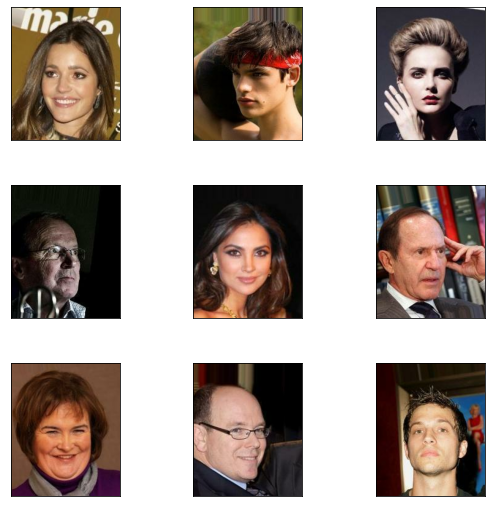

In [7]:
import gdown
import os
url = 'https://drive.google.com/uc?id=1tCj_CKUgjtThk1fiL0wP0WiuYxk4dvjT'
tfds_rootdir = '/root/' # for Google Colab
#tfds_rootdir = '~/' # for Linux

file_path = os.path.join(tfds_rootdir, 'tensorflow_datasets/celeb_a.zip')
file_dir = file_path.replace('.zip','')
gdown.download(url, file_path, quiet=False)

!unzip $file_path -d $file_dir

ds_train, ds_info = tfds.load('celeb_a', split='test', shuffle_files=False, with_info=True)
fig = tfds.show_examples(ds_info, ds_train)

## The Mean

In [8]:
sample_size=2000
ds_train = ds_train.batch(sample_size)
features = next(iter(ds_train.take(1)))
sample_images = features['image']
new_image = np.mean(sample_images, axis = 0)

In [14]:
n, h, w, c = features['image'].shape
n, h, w, c

(2000, 218, 178, 3)

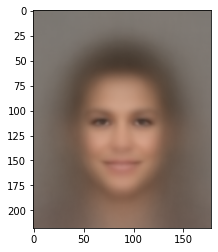

In [9]:
plt.imshow(new_image.astype(np.uint8));

In [10]:
## list all the attributes available
list(features['attributes'].keys())

['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

## Conditional Probability

In [11]:
def sample(req_attribs):
    sample_bool = []
    for i in range(sample_size):
        match = True
        for req_attrib in req_attribs:
            if features['attributes'][req_attrib][i] == False:
                match = False
                break
        sample_bool.append(match)
    return features['image'][np.array(sample_bool, dtype=np.bool)]

In [12]:
def sample_dataset(attributes):
    def sample_batch(features, req_attribs):
        sample_bool = []
        for i in range(sample_size):
            match = True
            for k, v in req_attribs.items():
                if features['attributes'][k][i] != v:
                    match = False
                    break
            sample_bool.append(match)
        return features['image'][np.array(sample_bool, dtype=np.bool)]
    
    samples = None
    for features in ds_train.take(9):
        mini_samples = sample_batch(features, attributes)
        if samples is not None:
            samples = np.append(samples, mini_samples, axis=0)
        else:
            samples = mini_samples

    return samples

attributes {'Male': True}
sample size: 6956


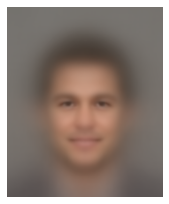

attributes {'Male': True, 'Eyeglasses': True}
sample size: 862


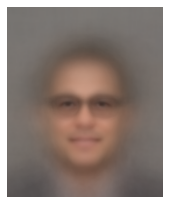

attributes {'Male': True, 'Eyeglasses': True, 'Mustache': True}
sample size: 122


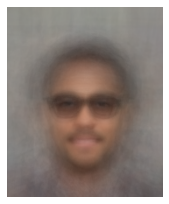

attributes {'Male': True, 'Eyeglasses': True, 'Mustache': True, 'Smiling': True}
sample size: 48


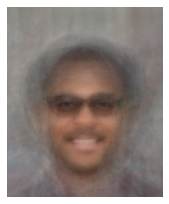

In [18]:
attributes_dict = {'Male':True, 
                   'Eyeglasses':True,
                   'Mustache':True,
                   'Smiling':True}
show_attribs = {}
for k, v in attributes_dict.items():
    show_attribs[k] = v
    sample_images = sample_dataset(show_attribs)
    print("attributes", show_attribs)
    print("sample size:",len(sample_images))
    new_image = np.mean(sample_images, axis=0)
    figure = plt.figure(figsize=(5,3.5))
    plt.axis('off')
    plt.imshow(new_image.astype(np.uint8))
    plt.show()

Instead of using the mean when generating images, you can try using the median as well, which may produce a sharper image. Simply replace `np.mean()` with `np.median()`.

attributes {'Male': True}
sample size: 6956


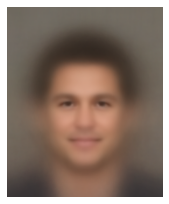

attributes {'Male': True, 'Eyeglasses': True}
sample size: 862


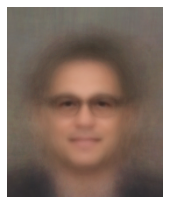

attributes {'Male': True, 'Eyeglasses': True, 'Mustache': True}
sample size: 122


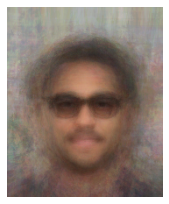

attributes {'Male': True, 'Eyeglasses': True, 'Mustache': True, 'Smiling': True}
sample size: 48


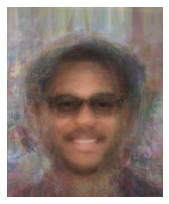

In [13]:
attributes_dict = {'Male':True, 
                   'Eyeglasses':True,
                   'Mustache':True,
                   'Smiling':True}
show_attribs = {}
for k, v in attributes_dict.items():
    show_attribs[k] = v
    sample_images = sample_dataset(show_attribs)
    print("attributes", show_attribs)
    print("sample size:",len(sample_images))
    new_image = np.median(sample_images, axis=0)
    figure = plt.figure(figsize=(5,3.5))
    plt.axis('off')
    plt.imshow(new_image.astype(np.uint8))
    plt.show()

## Probabilistic Sampling

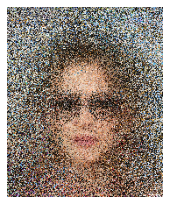

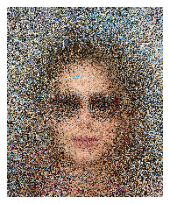

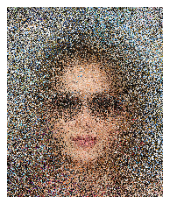

In [16]:
attributes_dict = {'Male':False,
                   'Eyeglasses': True,
                   'Smiling':False,
                   'Pointy_Nose':True,
                   }
sample_images = sample_dataset(attributes_dict)
new_image = np.zeros(sample_images.shape[1:], dtype=np.uint8)
for _ in range(3):
    for i in range(h):
        for j in range(w):
            rand_int = np.random.randint(0, sample_images.shape[0])
            new_image[i,j] = sample_images[rand_int,i,j]
    figure = plt.figure(figsize=(5,3.5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()